# CNN

##### 필기체를 분류하는 CNN 구현

In [2]:
# 분류 CNN 모델링
import keras
from keras import models, layers
from keras import backend 
# backend : 텐서 곱셈, 합성곱 등의 저수준의 연산을 할 수 있게 해준다.
# keras의 학습 단계에 접근할 수 있다.

class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()
        
        self.add(layers.Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=input_shape))
        self.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax')) # 분류니까 마지막 레이어의 노드 수를 분류하려는 갯수로 맞춰준다.`
        self.compile(loss = keras.losses.categorical_crossentropy, optimizer='rmsprop', metrics=['accuracy']) 
        # optimizer : 경사 내려오기
        # adagrad : 모든 매개 변수에 동일한 매개변수 적용 = 비효율적 → 각 매개 변수에 서로 다른 학습률 적용
        #           변화가 적은 매개 변수는 학습을 많이해서 학습률을 올려야함
        # rmsprop : adagrad의 학습 후반의 학습률 저하를 개선하기 위한 수식

In [8]:
# 분류 CNN을 위한 데이터 준비
from keras import datasets

class DATA():
    def __init__(self):
        num_classes = 10
        
        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        # x_train.shape = (60000, 28, 28) # img_rows : 가로 , img_cols : 세로
        img_rows, img_cols = x_train.shape[1:] 
        
        if backend.image_data_format() == 'channels_first': #'channels_first' = 특정 텐서에서 높이와 너비를 갖는것
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) # (60000, 1, 28, 28)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) # (10000, 1, 28, 28)
            input_shape = (1, img_rows, img_cols) # (1, 28, 28)
            
        else: #'channels_last' = 체널이 텐서의 마지막 위치에 있는것
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) # (60000, 28, 28, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) # (10000, 28, 28, 1)
            input_shape = (img_rows, img_cols, 1) # (28, 28, 1)
            
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train = x_train / 255.0
        x_test = x_test / 255.0
        
        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

In [3]:
# 학습 효과 분석
import matplotlib.pyplot as plt

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 0)
    
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 0)

In [4]:
# 분류 CNN 학습 및 성능 평가
def main():
    batch_size = 128
    epochs = 10
    
    data = DATA()
    model = CNN(data.input_shape, data.num_classes) # input_shape = (1, 28, 28), num_classes = 10
    history = model.fit(data.x_train, data.y_train, 
                        batch_size = batch_size, epochs = epochs, validation_split=0.2)
    score = model.evaluate(data.x_test, data.y_test)
    print()
    print('Test loss: ', score[0])
    print('Test accuracy: ', score[1])
    
    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()

Epoch 1/10
375/375 [==============================] - 296s 789ms/step - loss: 0.2624 - accuracy: 0.9198 - val_loss: 0.0709 - val_accuracy: 0.9776
Epoch 2/10
375/375 [==============================] - 173s 463ms/step - loss: 0.0928 - accuracy: 0.9727 - val_loss: 0.0500 - val_accuracy: 0.9855
Epoch 3/10
375/375 [==============================] - 160s 426ms/step - loss: 0.0687 - accuracy: 0.9800 - val_loss: 0.0440 - val_accuracy: 0.9868
Epoch 4/10
375/375 [==============================] - 165s 441ms/step - loss: 0.0567 - accuracy: 0.9828 - val_loss: 0.0408 - val_accuracy: 0.9884
Epoch 5/10
375/375 [==============================] - 164s 438ms/step - loss: 0.0517 - accuracy: 0.9848 - val_loss: 0.0390 - val_accuracy: 0.9887
Epoch 6/10
375/375 [==============================] - 225s 600ms/step - loss: 0.0478 - accuracy: 0.9862 - val_loss: 0.0387 - val_accuracy: 0.9879
Epoch 7/10
375/375 [==============================] - 283s 755ms/step - loss: 0.0426 - accuracy: 0.9873 - val_loss: 0.0406 -

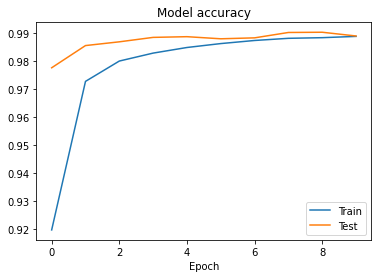

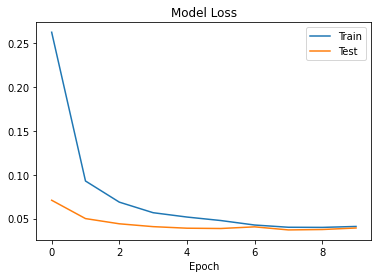

In [5]:
if __name__ == '__main__':
    main()

##### 컬러 이미지를 분류하는 CNN 세부 코드

In [8]:
# 분류 CNN 패키지 임포트

from sklearn import model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import os

from keras import backend as K
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [9]:
# 분류 CNN 모델링
class CNN(Model):
    def __init__(model, nb_classes, in_shape = None):
        model.nb_classes = nb_classes
        model.in_shape = in_shape
        model.build_model()
        super().__init__(model.x, model.y)
        model.compile()
        
    def build_model(model):
        nb_classes = model.nb_classes
        in_shape = model.in_shape
        
        x = Input(in_shape)
        
        h = Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=input_shape(x))
        h = Conv2D(64, (3, 3), activation = 'relu')(h)
        h = MaxPooling2D(pool_size=(2, 2))(h)
        h = Dropout(0.25)(h)
        h = Flatten()(h)
        z_cl = h
        
        h = Dense(128, activation='relu')(h)
        h = Dropout(0.5)(h)
        z_cl = h
        
        y = Dense(nb_classes, activation='softmax', name = 'preds')(h)
        
        model.cl_part = Model(x, z_cl)
        model.fl_part = Model(x, z_fl)
        model.x, model.y = x, y
        
    def compile(model):
        Model.compile(model, loss = 'categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [11]:
# 분류 CNN을 위한 데이터 준비
class DataSet:
    def __init__(self, X, y, nb_classes, scaling = True, test_size = 0.2, random_state = 0):
        self.X = X
        self.add_channels()
        
        X = self.X
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2,
                                                                           random_state = random_state)
        print(X_train.shape, y_train.shape)
        
        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        
        if scaling:
            scaler = MinmaxScaler()
            n = X_train.shape[0]
            X_train = scaler.fit_transform(X_train.reshape(n, -1)).reshape(X_train.shape)
            n = X_test.shape[0]
            X_test = scaler.fit_transform(X_test.reshape(n, -1)).reshape(X_test.shape)
            self.scaler = scaler
            
        print('X_train shape:', X_train.shape)
        print(X_train.shape[0], 'train samples')
        print(X_test.shape[0], 'test samples')
        
        Y_train = np_utils.to_categorical(y_train, nb_classes)
        Y_test = np_utils.to_categorical(y_test, np_classes)
        
        self.X_train, self.X_test = X_train, X_test
        self.Y_train, self.Y_test = Y_train, Y_test
        self.y_train, self.y_test = y_train, y_test
        
    def add_channels(self):
        X = self.X
        
        if len(X.shape) == 3:
            N, img_rows, img_cols = X.shape
            
            if K.image_dim_ordering() == 'th':
                X = X.reshape(X.shape[0], 1, img_rows, img_cols)
                input_shape = (1, img_rows, img_cols)
            else:
                X = X.reshape(X.shape[0], 1, img_rows, img_cols, 1)
                input_shape = (img_rows, img_cols, 1)
        else:
            input_shape = X.shape[1:]
        
        self.X = X
        self.input_shape = input_shape

In [13]:
# 분류 CNN의 학습 및 성능 평가
class Machine():
    def __init__(self, X, y, nb_classes = 2, fig = True):
        self.nb_classes = nb_classes
        self.set_data(X, y)
        self.set_model()
        self.fig = fig
        
    def set_data(self, X, y):
        nb_classes = self.nb_classes
        self.data = DataSet(X, y, nb_classes)
        print('data.input_shape', self.data.input_shape)
        
    def set_model(self):
        nb_classes = self.nb_classes
        data = self.data
        self.model = CNN(nb_classes = nb_classes, in_shape = data.input_shape)
        
    def fit(self, epochs = 10, batch_size = 128, verbose = 1):
        data = self.data
        model = self.model
        
        history = model.fit(data.X_train, data.Y_train, batch_size = batch_size, epochs=epochs,
                           verbose = verbose, validation_data = (data.X_test, data.Y_test))
        return history
    
    
    def plot_acc(history):
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.xlabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc = 0)

    def plot_loss(history):
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model Loss')
        plt.xlabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc = 0)
    
    def run(self, epochs = 100, batch_size = 128, verbose = 1):
        data = self.data
        model = self.model
        fig = self.fig
        
        history = self.fit(epochs = epochs, batch_size = batch_size, verbose = verbose)
        score = model.evaluate(data.X_test, data.Y_test, verbose = 0)
        
        print('Confusion matrix')
        Y_test_pred = model.predict(data.X_test, verbose =0)
        y_test_pred = np.argmax(Y_test_pred, axis=1)
        print(metrics.confusion_matrix(data.y_test, y_test_pred))
        
        print('Test score: ', score[0])
        print('Test accuracy: ', score[1])
        
        
        suffix = sflie.unique_filename('datatime')
        foldname = 'output_' + suffix
        os.makedirs(foldname)
        skeras.save_history_history('history_history.npy', history.history, fold=foldname)
        model.save_weights(os.path.join(foldname, 'dl_model.h5'))
        print('Output results are saved in ', foldname)
        
        if fig:
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plot_acc(history)
            plt.subplot(1, 2, 2)
            plot_loss(history)
            plt.show()
            
        self.history = history
        
        return foldname

##### 컬러 이미지를 분류하는 CNN 실행 코드

In [15]:
from keras import datasets
import keras
assert keras.backend.image_data_format() == 'channels_last'

from keraspp import aicnn

class Machine(aicn.Machine):
    def __init__(self):
        (X, y), (x_test, y_test) = datasets.cifar10.load_data()
        super().__init__(X, y, nb_classes=10)
        
    def main():
        m = Machine()
        m.run()
        
if __name__ == '__main__':
    main()

ModuleNotFoundError: No module named 'keraspp'